# Задача 12. Экспериментальное исследование алгоритмов решения задачи достижимости с КС ограничениями
# Автор: [Vladislav Miroshnikov](https://github.com/vladislav-miroshnikov)


## Введение
Пусть имеется размеченный ориентированный граф $G$. Будем интерпретировать его как конечный автомат. Таким образом, считаем, что граф $G$ (его представление в виде КА) задает регулярный язык $L_G$.

Пусть нам задана КС-грамматика $CFG$, задающая язык ограничений $L_{CFG}$.

Рассмотрим задачу $CFPQ = \{(v_i, v_j)|\exists\pi:w(v_i\pi v_j)\in L, v_i\in V_S, v_j\in V_F\}$, где $L = L_G\cap L_{CFG}$

Для языка $L_{CFG}$ строим рекурсивный автомат --- в нашем случае являющийся конечным автоматом над смешанным алфавитом грамматики.

## Постановка задачи
Задача посвящена анализу производительности различных алгоритмов решения задачи достижимости с контекстно-свободными ограничениями: алгоритма Хеллингса, матричного алгоритма, тензорного алгоритма. В ходе анализа необходимо
- Сравнить производительности реализаций различных алгоритмов для одной аппаратной платформы (CPU, GPU) и определить наиболее производительный алгоритм в рамках одной платформы.
- Сравнить производительности различных реализаций алгоритмов для разных платформ (CPU vs. GPU) и определить наиболее производительную реализацию.
- Сравнить производительности CFPQ алгоритмов со специализированными RPQ алгоритмами в задаче RPQ анализа и определить необходимость существования решения для частных случаев.

## Ход работы и задачи

- [x] Используя [pyCuBool](https://pypi.org/project/pycubool/) реализовать матричный алгоритм решения задачи достижимости с КС ограничениями. Аналогично тому, как это было сделано в домашней работе 10.
- [x] Используя [pyCuBool](https://pypi.org/project/pycubool/) реализовать тензорный алгоритм решения задачи достижимости с КС ограничениями. Аналогично тому, как это было сделано в домашней работе 11.
- [x] Подключить реализацию алгоритма Хеллингса из работы 9, матричного из 10 и тензорного из 11.
- [x] Сформировать набор данных.
  - [x] Выбрать все графы из раздела [RDF](https://jetbrains-research.github.io/CFPQ_Data/dataset/RDF.html).
  - [x] Запросы к RDF состоят из следующих блоков
    - Запросы из работы 5. Так как регулярные языки --- это подмножество контекстно-свободных, то решения, рассматриваемые в данной работе должны справляться с ними. Взять необходимо ровно те запросы, которые использовали именно вы. При этом, обратите внимание на то, что для разных алгоритмов нужен разный формат входа. Например, для тензорного грамматику из регулярного выражения можно получить просто сделав это выражение правой частью единственного правила.
    - Три классических запроса для анализа иерархии.
      - ```S -> subClassOf_r S subClassOf | type_r S type | subClassOf_r subClassOf | type_r type ```
      - ```S -> subClassOf_r S subClassOf | subClassOf ```
      - ```S -> broaderTransitive S broaderTransitive_r | broaderTransitive broaderTransitive_r ```
  - [x] Выбрать графы bzip, gzip, ls, init, drivers, arch. Это графы, построенные по реальным программам и предназначенные для решения задач статического анализа.
  - [x] Для статического анализа использовать единственный запрос. Обратите внимание, что он записан в максимально общем виде и непосредственно грамматика будет зависеть от алгоритма, который будет исследоваться.
    - ```
       M -> d_r V d
       V -> (M? a_r)∗ M? (a M?)∗
      ```
- [x] С использованием сформированного набора данных провести сравнение производительности следующих решений
  - алгоритм Хеллингса
  - матричный алгоритм, реализованный с использованием sciPy
  - тензорный алгоритм, реализованный с использованием sciPy
  - матричный алгоритм, реализованный с использованием pyCuBool
  - тензорный алгоритм, реализованный с использованием pyCuBool
  - алгоритм выполнения регулярных запросов, реализованный с использованием pyCuBool (работа 5). Здесь только для RDF и регулярных запросов.
  - алгоритм выполнения регулярных запросов, реализованный с использованием sciPy. Здесь только для RDF и регулярных запросов.
- [x] Оформить результаты экспериментов
- [x] Провести анализ результатов
- [x] Сделать notebook доступным по ссылке (обязательно выдать права на комментирование проверяющему)

## Настройка и инициализация рабочего окружения

Скачивание и установка проекта https://github.com/vladislav-miroshnikov/formal-lang-course

In [1]:
!git clone https://github.com/vladislav-miroshnikov/formal-lang-course

Cloning into 'formal-lang-course'...
remote: Enumerating objects: 708, done.
remote: Counting objects: 100% (478/478), done.
remote: Compressing objects: 100% (275/275), done.
remote: Total 708 (delta 294), reused 324 (delta 175), pack-reused 230
Receiving objects: 100% (708/708), 1.06 MiB | 3.92 MiB/s, done.
Resolving deltas: 100% (360/360), done.


Подключение директории проекта

In [2]:
%cd formal-lang-course

/content/formal-lang-course


In [3]:
%mkdir -p benchmark
%mkdir benchmark/scipy_cfpq_matrix
%mkdir benchmark/pycubool_cfpq_matrix
%mkdir benchmark/scipy_cfpq_hellings
%mkdir benchmark/scipy_cfpq_tensor
%mkdir benchmark/pycubool_cfpq_tensor

Установка зависимостей проекта

In [5]:
!pip install -r requirements.txt

Установка библиотеки pycubool

In [6]:
!pip install pycubool

     |████████████████████████████████| 1.5 MB 5.7 MB/s 


## **Описание набора данных для экспериментов**


### Графы
Датасет состоит из графов и запросов, представленных контекстно-свободными грамматиками над метками соответствующих графов.

**Пределы возможностей**: 

Стоит отметить, что в данный список не вошли графы taxonomy, taxonomy_hierarchy, поскольку вычислительных возможностей Google Colab - среды выполнения, недостаточно для обработки этих графов.

Для проведения эксперимета использовались RDF графы, представленные в библиотеке [`CFPQ_Data`](https://jetbrains-research.github.io/CFPQ_Data/dataset/RDF.html), кроме графов *taxonomy*, *taxonomy_hierarchy* (которые не поместились в ОЗУ) и *go_hierarchy* (который имеет всего одну метку).


In [7]:
from cfpq_data import graph_from_dataset
from project.graph_funcs import get_graph_info

class Graph:
  def __init__(self, nxgraph, info=None):
    self.nxgraph = nxgraph
    self.info = info

In [8]:
rdf_names = [
             'atom_primitive', 
             'biomedical_mesure_primitive', 
             'core', 
             'eclass_514en', 
             'enzyme', 
             'foaf', 
             'funding', 
             'generations', 
             'geospecies', 
             'go', 
             'go_hierarchy', 
             'pathways', 
             'people_pets', 
             'pizza', 
             'skos', 
             'travel', 
             'univ_bench', 
             'wine'
] 

In [9]:
graphs = {}
for name in rdf_names:
  nxgraph = graph_from_dataset(name, verbose=True)
  graphs[name] = Graph(nxgraph, get_graph_info(nxgraph))

Loading...: 100%|██████████| 273/273 [00:00<00:00, 74290.86it/s]
file:///usr/local/lib/python3.7/dist-packages/cfpq_data/data/RDF/Graphs/<http:/sw.opencyc.org/concept/Mx4rvVi495wpEbGdrcN5Y29ycA> does not look like a valid URI, trying to serialize this will break.
file:///usr/local/lib/python3.7/dist-packages/cfpq_data/data/RDF/Graphs/<http:/sw.opencyc.org/concept/Mx4rvVi495wpEbGdrcN5Y29ycA> does not look like a valid URI, trying to serialize this will break.
Loading...: 100%|██████████| 1839/1839 [00:00<00:00, 109207.49it/s]


In [10]:
import pandas as pd

data = {name: [graph.info.nodes, graph.info.edges, len(graph.info.labels)] for name, graph in graphs.items()}
columns = ['Nodes number', 'Edges number', 'Labels number']

graph_info = pd.DataFrame.from_dict(data, orient='index', columns=columns)
graph_info

,Nodes number,Edges number,Labels number
atom_primitive,291,425,17
biomedical_mesure_primitive,341,459,10
core,1323,2752,31
eclass_514en,239111,360248,10
enzyme,48815,86543,14
foaf,256,631,15
funding,778,1086,20
generations,129,273,17
geospecies,450609,2201532,165
go,582929,1437437,47


go_hierarchy имеет всего 1 метку, поэтому не будем рассматривать этот набор данных

In [11]:
rdf_names.remove('go_hierarchy')
graphs.pop('go_hierarchy', None)

Разобьем графы на большие и небольшие для удобства постановки экспериментов 

In [12]:
large_graph_names = ['enzyme', 'eclass_514en', 'geospecies', 'go']
small_graph_names = list(set(rdf_names) - set(large_graph_names))
large_graphs = {name: graphs[name] for name in large_graph_names}
small_graphs = {name: graphs[name] for name in small_graph_names}

### Запросы



#### Регулярные запросы

К каждому графу $G$ отправлялись регулярные запросы следующего вида:

Данные запросы используют все общепринятые конструкции регулярных выражений (замыкание, конкатенация, звезда Клини):

- $(l_1|l_2)*l_3$

- $(l_1|l_2)^+l_3^*$

- $l_1l_2l_3(l_4|l_1)^*$

- $(l_1|l_2|l_3)^*$

где $l_1, l_2, l_3, l_4$ – первые 4 метки графа $G$.


Все вершины графа помечались как стартовые и финальные.

#### Запросы для анализа иерархии

- Три классических запроса для анализа иерархии.
  - ```
  S -> subClassOf_r S subClassOf | type_r S type | subClassOf_r subClassOf | type_r type 
  ```
  - ```
  S -> subClassOf_r S subClassOf | subClassOf 
  ```
  - ```
  S -> broaderTransitive S broaderTransitive_r | broaderTransitive broaderTransitive_r 
  ```

#### Запрос для статического анализа

In [12]:
from project.ecfg_utils import read_ecfg_from_text

def cfg_static():
  return read_ecfg_from_text(
      """
      M -> d_r V d
      V -> ((M | $) a_r)* (M | $) (a (M | $))*
      """
  )



#### Реализация запросов

In [13]:
from pyformlang.cfg import CFG
from pyformlang.regular_expression.regex_objects import Symbol


def create_first_regex(labels):
  """(l1|l2)*l3"""
  r1 = str(labels[0])
  r2 = str(labels[1])
  r3 = str(labels[2])
  return CFG.from_text(f'S -> A {r3}\n A -> {r1} A \n A -> {r2} A \n A -> epsilon \n')

def create_second_regex(labels):
  """(l1|l2)+l3*"""
  r1 = str(labels[0]) 
  r2 = str(labels[1])
  r3 = str(labels[2])
  return CFG.from_text(f'S -> С A B\n A -> {r1} A \n A -> {r2} A \n A -> epsilon \n B -> {r3} B \n B -> epsilon \n C -> {r1} | {r2}')

def create_third_regex(labels):
  """l1 l2 l3 (l4|l1)*"""
  r1 = str(labels[0])
  r2 = str(labels[1])
  r3 = str(labels[2])
  r4 = str(labels[3])
  return CFG.from_text(f'S -> {r1} {r2} {r3} A \n A -> {r1} A \n A -> {r4} A \n A -> epsilon')

def create_fourth_regex(labels):
  """(l1|l2|l3)*"""
  r1 = str(labels[0])
  r2 = str(labels[1])
  r3 = str(labels[2])
  return CFG.from_text(f'S -> epsilon \n S -> {r1} S \n S -> {r2} S \n S -> {r3} S')

def get_label_by_substr(labels, substr):
  for label in labels:
    if label.count(substr):
      return label
  return substr

def add_reverse_labels(graph, labels, label):
  e = list(graph.edges(data="label", default=''))
  for (u, v, l) in e:
    if l.count(label):
      graph.add_edge(v, u, label=l + '_r')

def create_first_hierarchy(graph, labels):
  subClassOf = get_label_by_substr(labels, 'subClassOf')
  add_reverse_labels(graph, labels, 'subClassOf')
  subClassOf_r = subClassOf + '_r'
  type_ = get_label_by_substr(labels, 'type')
  add_reverse_labels(graph, labels, 'type')
  type_r = type_ + '_r'
  return CFG.from_text(f'S -> {subClassOf_r} S {subClassOf} | {type_r} S {type_} | {subClassOf_r} {subClassOf} | {type_r} {type_}')

def create_second_hierarchy(graph, labels):
  subClassOf = get_label_by_substr(labels, 'subClassOf')
  add_reverse_labels(graph, labels, 'subClassOf')
  subClassOf_r = subClassOf + '_r'
  return CFG.from_text(f'S -> {subClassOf_r} S {subClassOf} | {subClassOf}')

def create_third_hierarchy(graph, labels):
  broaderTransitive = get_label_by_substr(labels, 'broaderTransitive')
  add_reverse_labels(graph, labels, 'broaderTransitive')
  broaderTransitive_r = broaderTransitive + '_r'
  return CFG.from_text(f'S -> {broaderTransitive} S {broaderTransitive_r} | {broaderTransitive} {broaderTransitive_r}')

def create_queries(graph, labels):
  return [
      create_first_regex(labels),
      create_second_regex(labels),
      create_third_regex(labels),
      create_fourth_regex(labels),
      create_first_hierarchy(graph, labels),
      create_second_hierarchy(graph, labels),
      create_third_hierarchy(graph, labels),
      #cfg_static()
  ]

## Среда выполнения

Операционная система

In [ ]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


Информация о CPU:

In [ ]:
!lscpu | grep 'Model name'
!lscpu | grep 'Socket(s)'
!lscpu | grep 'Core(s) per socket:'
!lscpu | grep 'Thread(s) per core'
!lscpu | grep "MHz"

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Socket(s):           1
Core(s) per socket:  1
Thread(s) per core:  2
CPU MHz:             2299.998


Информация о GPU:

In [ ]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Tue Dec 14 12:21:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    76W / 149W |     60MiB / 11441MiB |      0%      Default |
|                               |            

Информация о RAM:

In [ ]:
!echo 'Total RAM (GB)'
!awk '( $1 == "MemTotal:" ) { print $2/1048576 }' /proc/meminfo

Total RAM (GB)
12.6867


## Методология проведения эксперимента 

Эксперимент проводился в облачной среде Google Colab. Алгоритм на основе матриц из scipy запускался на CPU, на основе pycubool – на GPU.

Каждый запрос к "маленьким" графам выполнялся 10 раз, а к "большим" 3 раза по причине длительного времени запроса.

### Инфраструктура для проведения эксперимента

In [15]:
import csv
import time

from project.cfpq import (
    hellings_cfpq, matrix_cfpq, tensor_cfpq
)

In [16]:
def write_measurements(path, rows):
  fieldnames = ['Query', 'CFPQ_size', 'Time(s)']

  with open(path, 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

In [13]:
import signal

def signal_handler(signum, frame):
    raise Exception("Timed out!")

signal.signal(signal.SIGALRM, signal_handler)


def measure_cfpq_time(graph, queries, fabm, num_runs, timeouts=None):
    rows = []
    for _ in range(num_runs):
      for i, query in enumerate(queries):
        cfpq_ans = start_time = end_time = None
        if timeouts:
            signal.alarm(int(timeouts[i] + 1))
        try:
            start_time = time.time()
            if fabm == 'cfpq_matrix':
              cfpq_ans = matrix_cfpq(graph, query)
            elif fabm == 'cfpq_hellings':
              cfpq_ans = hellings_cfpq(graph, query)
            elif fabm == 'cfpq_tensor':
              cfpq_ans = tensor_cfpq(graph, query)
            elif fabm == 'cfpq_matrix_cb':
              cfpq_ans = matrix_cfpq_cb(graph, query)
            elif fabm == 'cfpq_tensor_cb':
              cfpq_ans = tensor_cfpq_cb(graph, query)
            end_time = time.time()
        except Exception:
            end_time = time.time()
        rows.append({
            'Time(s)': end_time - start_time, 
            'CFPQ_size': len(cfpq_ans) if cfpq_ans else 'NaN', 
            'Query': i
            })
    return rows

In [18]:
from tqdm import tqdm

def measure_algs_performance(graphs, num_runs, algos, timeouts=None):
  for algo_name, algo, path in algos:
    print(f'Measuring performance of algorithm {algo} based on {algo_name} ...')
    for graph_name, graph in tqdm(graphs.items()):

      labels = list(graph.info.labels)

      measurements = measure_cfpq_time(
          graph.nxgraph, 
          create_queries(graph.nxgraph, labels), 
          algo, 
          num_runs=num_runs,
          timeouts=timeouts
          )
      
      write_measurements(f'{path}/{graph_name}.csv', measurements)

## Проведение замеров на *scipy*

In [29]:
scipy_algos = [
         ('scipy', 'cfpq_matrix', 'benchmark/scipy_cfpq_matrix'),
         ('scipy', 'cfpq_hellings', 'benchmark/scipy_cfpq_hellings'),
         ('scipy', 'cfpq_tensor', 'benchmark/scipy_cfpq_tensor'),
]

In [ ]:
measure_algs_performance(small_graphs, num_runs=10, algos=scipy_algos)

## Реализация через *pycubool*

Приведем реализацию матричного и тензорного алгоритмов, основанных на использовании *pycubool*

In [ ]:
from project.ecfg import ECFG
from project.wcnf_utils import convert_cfg_to_wcnf
from project.rsm_utils import convert_ecfg_to_rsm
from project.graph_funcs import get_nfa_by_graph
from networkx import MultiDiGraph
from pyformlang.cfg import CFG

import pycubool as cb

def matrix_cb(graph, cfg):
    wcnf = convert_cfg_to_wcnf(cfg)

    eps_prod_heads = [p.head.value for p in wcnf.productions if not p.body]
    term_productions = {p for p in wcnf.productions if len(p.body) == 1}
    var_productions = {p for p in wcnf.productions if len(p.body) == 2}
    nodes_num = graph.number_of_nodes()
    matrices = {
        v.value: cb.Matrix.empty(shape=(nodes_num, nodes_num)) for v in wcnf.variables
    }

    for i, j, data in graph.edges(data=True):
        l = data["label"]
        for v in {p.head.value for p in term_productions if p.body[0].value == l}:
            matrices[v][i, j] = True

    for i in range(nodes_num):
        for v in eps_prod_heads:
            matrices[v][i, i] = True

    any_changing = True
    while any_changing:
        any_changing = False
        for p in var_productions:
            old_nnz = set(matrices[p.head.value].to_list())
            matrices[p.head.value] = matrices[p.head.value].ewiseadd(
                matrices[p.body[0].value].mxm(matrices[p.body[1].value])
            )
            new_nnz = set(matrices[p.head.value].to_list())
            any_changing = any_changing or old_nnz != new_nnz

    return {
        (u, variable, v)
        for variable, matrix in matrices.items()
        for u, v in matrix.to_list()
    }

### Класс для булевых матриц 
Данный класс для булевых матрицы использует библиотеку **pycubool**. 


In [ ]:
from pyformlang.finite_automaton import NondeterministicFiniteAutomaton
import pycubool as cb

__all__ = ["CuBooleanMatrices"]

#Based on gpu library
class CuBooleanMatrices:
    def __init__(self, n_automaton: NondeterministicFiniteAutomaton = None):
        if n_automaton is None:
            self.states_count = 0
            self.state_indices = dict()
            self.start_states = set()
            self.final_states = set()
            self.bool_matrices = dict()
        else:
            self.states_count = len(n_automaton.states)
            self.state_indices = {
                state: index for index, state in enumerate(n_automaton.states)
            }
            self.start_states = n_automaton.start_states
            self.final_states = n_automaton.final_states
            self.bool_matrices = self.init_bool_matrices(n_automaton)

    def get_states(self):
        return self.state_indices.keys()

    def get_start_states(self):
        return self.start_states

    def get_final_states(self):
        return self.final_states

    def init_bool_matrices(self, n_automaton: NondeterministicFiniteAutomaton):
        """
        Initialize boolean matrices of NondeterministicFiniteAutomaton

        Parameters
        ----------
        n_automaton: NondeterministicFiniteAutomaton
            NFA to transform to matrix

        Returns
        -------
        bool_matrices: dict
            Dict of boolean matrix for every automata label-key
        """
        bool_matrices = dict()
        nfa_dict = n_automaton.to_dict()
        for state_from, trans in nfa_dict.items():
            for label, states_to in trans.items():
                if not isinstance(states_to, set):
                    states_to = {states_to}
                for state_to in states_to:
                    index_from = self.state_indices[state_from]
                    index_to = self.state_indices[state_to]
                    if label not in bool_matrices:
                        bool_matrices[label] = cb.Matrix.empty(shape=(self.states_count, self.states_count))           
                    bool_matrices[label][index_from, index_to] = True

        return bool_matrices

    def make_transitive_closure(self):
        """
        Makes transitive closure of boolean matrices

        Returns
        -------
        tc: cuBool matrix
            Transitive closure of boolean matrices
        """
        if not self.bool_matrices.values():
            return cb.Matrix.empty(shape=(2, 2))

        shape = list(self.bool_matrices.values())[0].shape
        tc = cb.Matrix.empty(shape=shape)

        for elem in self.bool_matrices.values():
            tc = tc.ewiseadd(elem)
        prev_nnz = tc.nvals
        curr_nnz = 0

        while prev_nnz != curr_nnz:
            tc = tc.ewiseadd(tc.mxm(tc))
            prev_nnz, curr_nnz = curr_nnz, tc.nvals


        return tc


### Дополнительные функции 
Введем дополнительные функции для работы с классом булевых матриц, объявленных выше

In [ ]:
from pyformlang.finite_automaton import NondeterministicFiniteAutomaton, State
import pycubool as cb

__all__ = ["intersect_boolean_matrices_cb"]


def intersect_boolean_matrices_cb(self: CuBooleanMatrices, other: CuBooleanMatrices):
    """
    Makes intersection of self boolean matrix with other

    Parameters
    ----------
    self: CuBooleanMatrices
        Left-hand side boolean matrix
    other: CuBooleanMatrices
        Right-hand side boolean matrix

    Returns
    -------
    intersect_bm: CuBooleanMatrices
        Intersection of two boolean matrices
    """
    intersect_bm = CuBooleanMatrices()
    intersect_bm.num_states = self.states_count * other.states_count
    common_symbols = self.bool_matrices.keys() & other.bool_matrices.keys()

    for symbol in common_symbols:
        intersect_bm.bool_matrices[symbol] = self.bool_matrices[symbol].kronecker(other.bool_matrices[symbol])
        
    for state_fst, state_fst_index in self.state_indices.items():
        for state_snd, state_snd_idx in other.state_indices.items():
            new_state = new_state_idx = (
                state_fst_index * other.states_count + state_snd_idx
            )
            intersect_bm.state_indices[new_state] = new_state_idx

            if state_fst in self.start_states and state_snd in other.start_states:
                intersect_bm.start_states.add(new_state)

            if state_fst in self.final_states and state_snd in other.final_states:
                intersect_bm.final_states.add(new_state)

    return intersect_bm

In [ ]:
import networkx as nx
from typing import Tuple, Set

def tensor_cb(graph: nx.MultiDiGraph, cfg: CFG) -> Set[Tuple[int, str, int]]:
    """
    Tensor algorithm for solving Context-Free Path Querying problem

    Parameters
    ----------
    graph: nx.MultiDiGraph
        input graph
    cfg: CFG
        input cfg

    Returns
    -------
    set[Tuple[int, str, int]]:
        set tuples (node, terminal, node)
    """
    wcnf = convert_cfg_to_wcnf(cfg)

    n = sum(len(p.body) + 1 for p in wcnf.productions)
    rsm_heads = dict()
    nonterm = set()
    boxes = dict()
    start_states = set()
    final_states = set()
    counter = 0

    nfa_by_graph = get_nfa_by_graph(graph)
    bm = CuBooleanMatrices(nfa_by_graph)

    for p in wcnf.productions:
        nonterm.add(p.head.value)
        start_states.add(counter)
        final_states.add(counter + len(p.body))
        rsm_heads[(counter, counter + len(p.body))] = p.head.value
        for b in p.body:
            m = boxes.get(b.value, cb.Matrix.empty(shape=(n,n)))
            m[counter, counter + 1] = True
            boxes[b.value] = m
            counter += 1
        counter += 1

    for p in wcnf.productions:
        if len(p.body) == 0:
            tmp = cb.Matrix.empty(shape=(bm.states_count, bm.states_count))
            for i in range(bm.states_count):
              tmp[i, i] = True
            bm.bool_matrices[p.head.value] = tmp

    bfa = CuBooleanMatrices()
    bfa.start_states = start_states
    bfa.final_states = final_states
    bfa.bool_matrices = boxes
    bfa.states_count = n
    prev_nnz = -2
    new_nnz = -1
    while prev_nnz != new_nnz:
        transitive_closure = intersect_boolean_matrices_cb(
            bfa, bm
        ).make_transitive_closure()
        prev_nnz, new_nnz = new_nnz, transitive_closure.nvals
        x, y = transitive_closure.to_lists()

        for (i, j) in zip(x, y):
            rfa_from = i // bm.states_count
            rfa_to = j // bm.states_count
            graph_from = i % bm.states_count
            graph_to = j % bm.states_count

            if (rfa_from, rfa_to) not in rsm_heads:
                continue

            variable = rsm_heads[(rfa_from, rfa_to)]
            m = bm.bool_matrices.get(
                variable,
                cb.Matrix.empty(shape=(bm.states_count, bm.states_count)),
            )
            m[graph_from, graph_to] = True
            bm.bool_matrices[variable] = m

    return {
        (u, key, v)
        for key, m in bm.bool_matrices.items()
        if key in nonterm
        for (u, v) in zip(*m.to_lists())
    }


### Тесты для проверки корректности работы алгоритмов

In [ ]:
from project.graph_funcs import create_two_cycles_graph
from project.cfpq_algorithms import matrix
from project.cfpq_algorithms import tensor
from cfpq_data import labeled_cycle_graph

tests = {
    (
        CFG.from_text(
          """
          S -> epsilon
          """
        ),
        create_two_cycles_graph(2, 1, ("a", "b"))
    ),
    (
        CFG.from_text(
            """
            S -> a | epsilon
            """
        ),
        labeled_cycle_graph(3, "a", verbose=False)
    ),
    (
        CFG.from_text(
            """
                S -> A B
                S -> A C
                C -> S B
                A -> a
                B -> b
            """
        ),
        create_two_cycles_graph(3, 2, ("a", "b"))
    ),
    (
        CFG.from_text(
          """
              S -> A B
              S -> A C
              C -> S B
              A -> a
              B -> b
          """
        ),
        create_two_cycles_graph(3, 2, ("a", "b"))

    )
}

for (cfg, graph) in tests:
  assert matrix_cb(graph, cfg) == matrix(graph, cfg)
  assert tensor_cb(graph, cfg) == tensor(graph, cfg)

### Итоговые функции для исследований

In [ ]:
from pyformlang.cfg import Variable
from project.cfpq import _cfpq

def matrix_cfpq_cb(
        graph: nx.MultiDiGraph,
        cfg: CFG,
        start_nodes: Set[int] = None,
        final_nodes: Set[int] = None,
        start_variable: Variable = Variable("S"),
) -> Set[Tuple[int, int]]:
    cfg._start_symbol = start_variable

    return _cfpq(set(matrix_cb(graph, cfg)), cfg, start_nodes, final_nodes)


def tensor_cfpq_cb(
        graph: nx.MultiDiGraph,
        cfg: CFG,
        start_nodes: Set[int] = None,
        final_nodes: Set[int] = None,
        start_variable: Variable = Variable("S"),
) -> Set[Tuple[int, int]]:
    cfg._start_symbol = start_variable

    return _cfpq(set(tensor_cb(graph, cfg)), cfg, start_nodes, final_nodes)


## Проведение замеров на *pycubool*

In [23]:
pycubool_algos = [
         ('pycubool', 'cfpq_matrix_cb', 'benchmark/pycubool_cfpq_matrix'),
         ('pycubool', 'cfpq_tensor_cb', 'benchmark/pycubool_cfpq_tensor'),
]

In [ ]:
measure_algs_performance(large_graphs, num_runs=3, algos=pycubool_algos)

Measuring performance of algorithm cfpq_matrix_cb based on pycubool ...


100%|██████████| 1/1 [05:31<00:00, 331.89s/it]


Measuring performance of algorithm cfpq_tensor_cb based on pycubool ...


100%|██████████| 1/1 [1:26:23<00:00, 5183.17s/it]


## Анализ полученных результатов

### Инфраструктура проведения анализа результатов

In [24]:
def create_df(graph_names, algos):
  dfs = []

  for algo_name, algo, path in algos:
    for graph_name in graph_names:
      df = pd.read_csv(f'{path}/{graph_name}.csv')
      df.insert(0, 'Algorithm', algo_name + '_' + algo)
      df.insert(0, 'Graph', graph_name)
      dfs.append(df)

  return pd.concat(dfs, ignore_index=True)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


def show_barplots(df, title):
  fig, axes = plt.subplots(9, 2, figsize=(18, 40))
  fig.subplots_adjust(left=0.05, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
  fig.suptitle(title, fontsize=25)
  fig.delaxes(axes[8, 1])

  for i, name in enumerate(small_graph_names + large_graph_names):
    sns.barplot(ax=axes[i // 2, i % 2], x="Query", y="Time(s)", hue='Algorithm', data=df[df['Graph'] == name]).set_title(name)
  plt.show();

### Алгоритмы, основанные на *scipy*

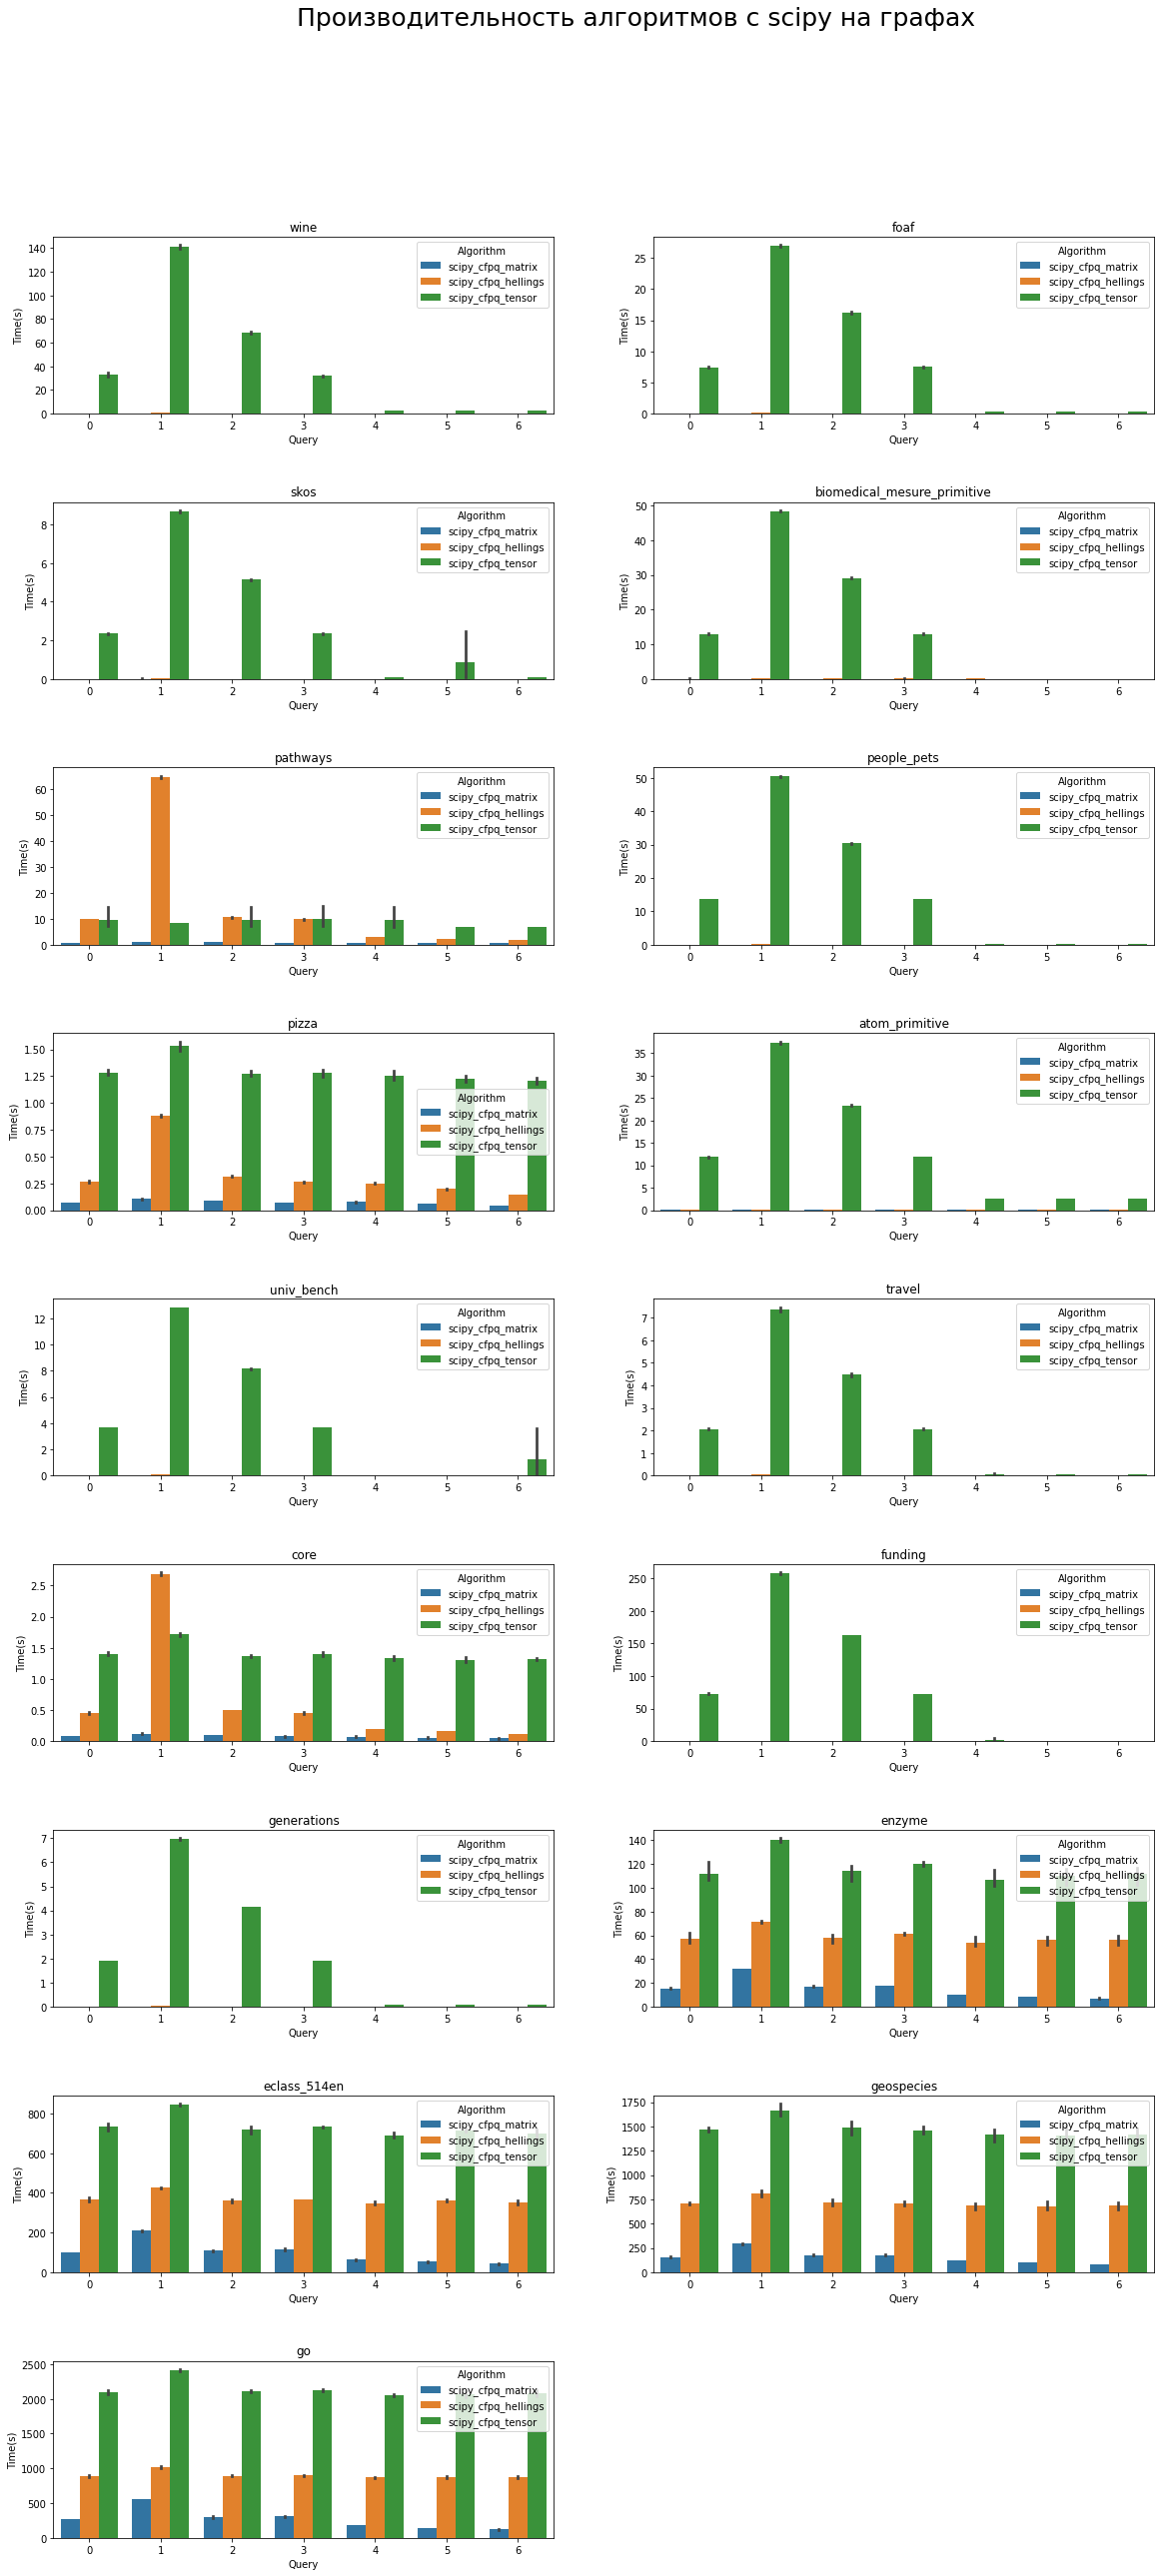

In [30]:
df_sm_scipy = pd.merge(create_df(small_graph_names + large_graph_names, scipy_algos), graph_info, right_index=True, left_on='Graph')
show_barplots(df_sm_scipy, 'Производительность алгоритмов с scipy на графах')

### Алгоритмы, основанные на *pycubool*

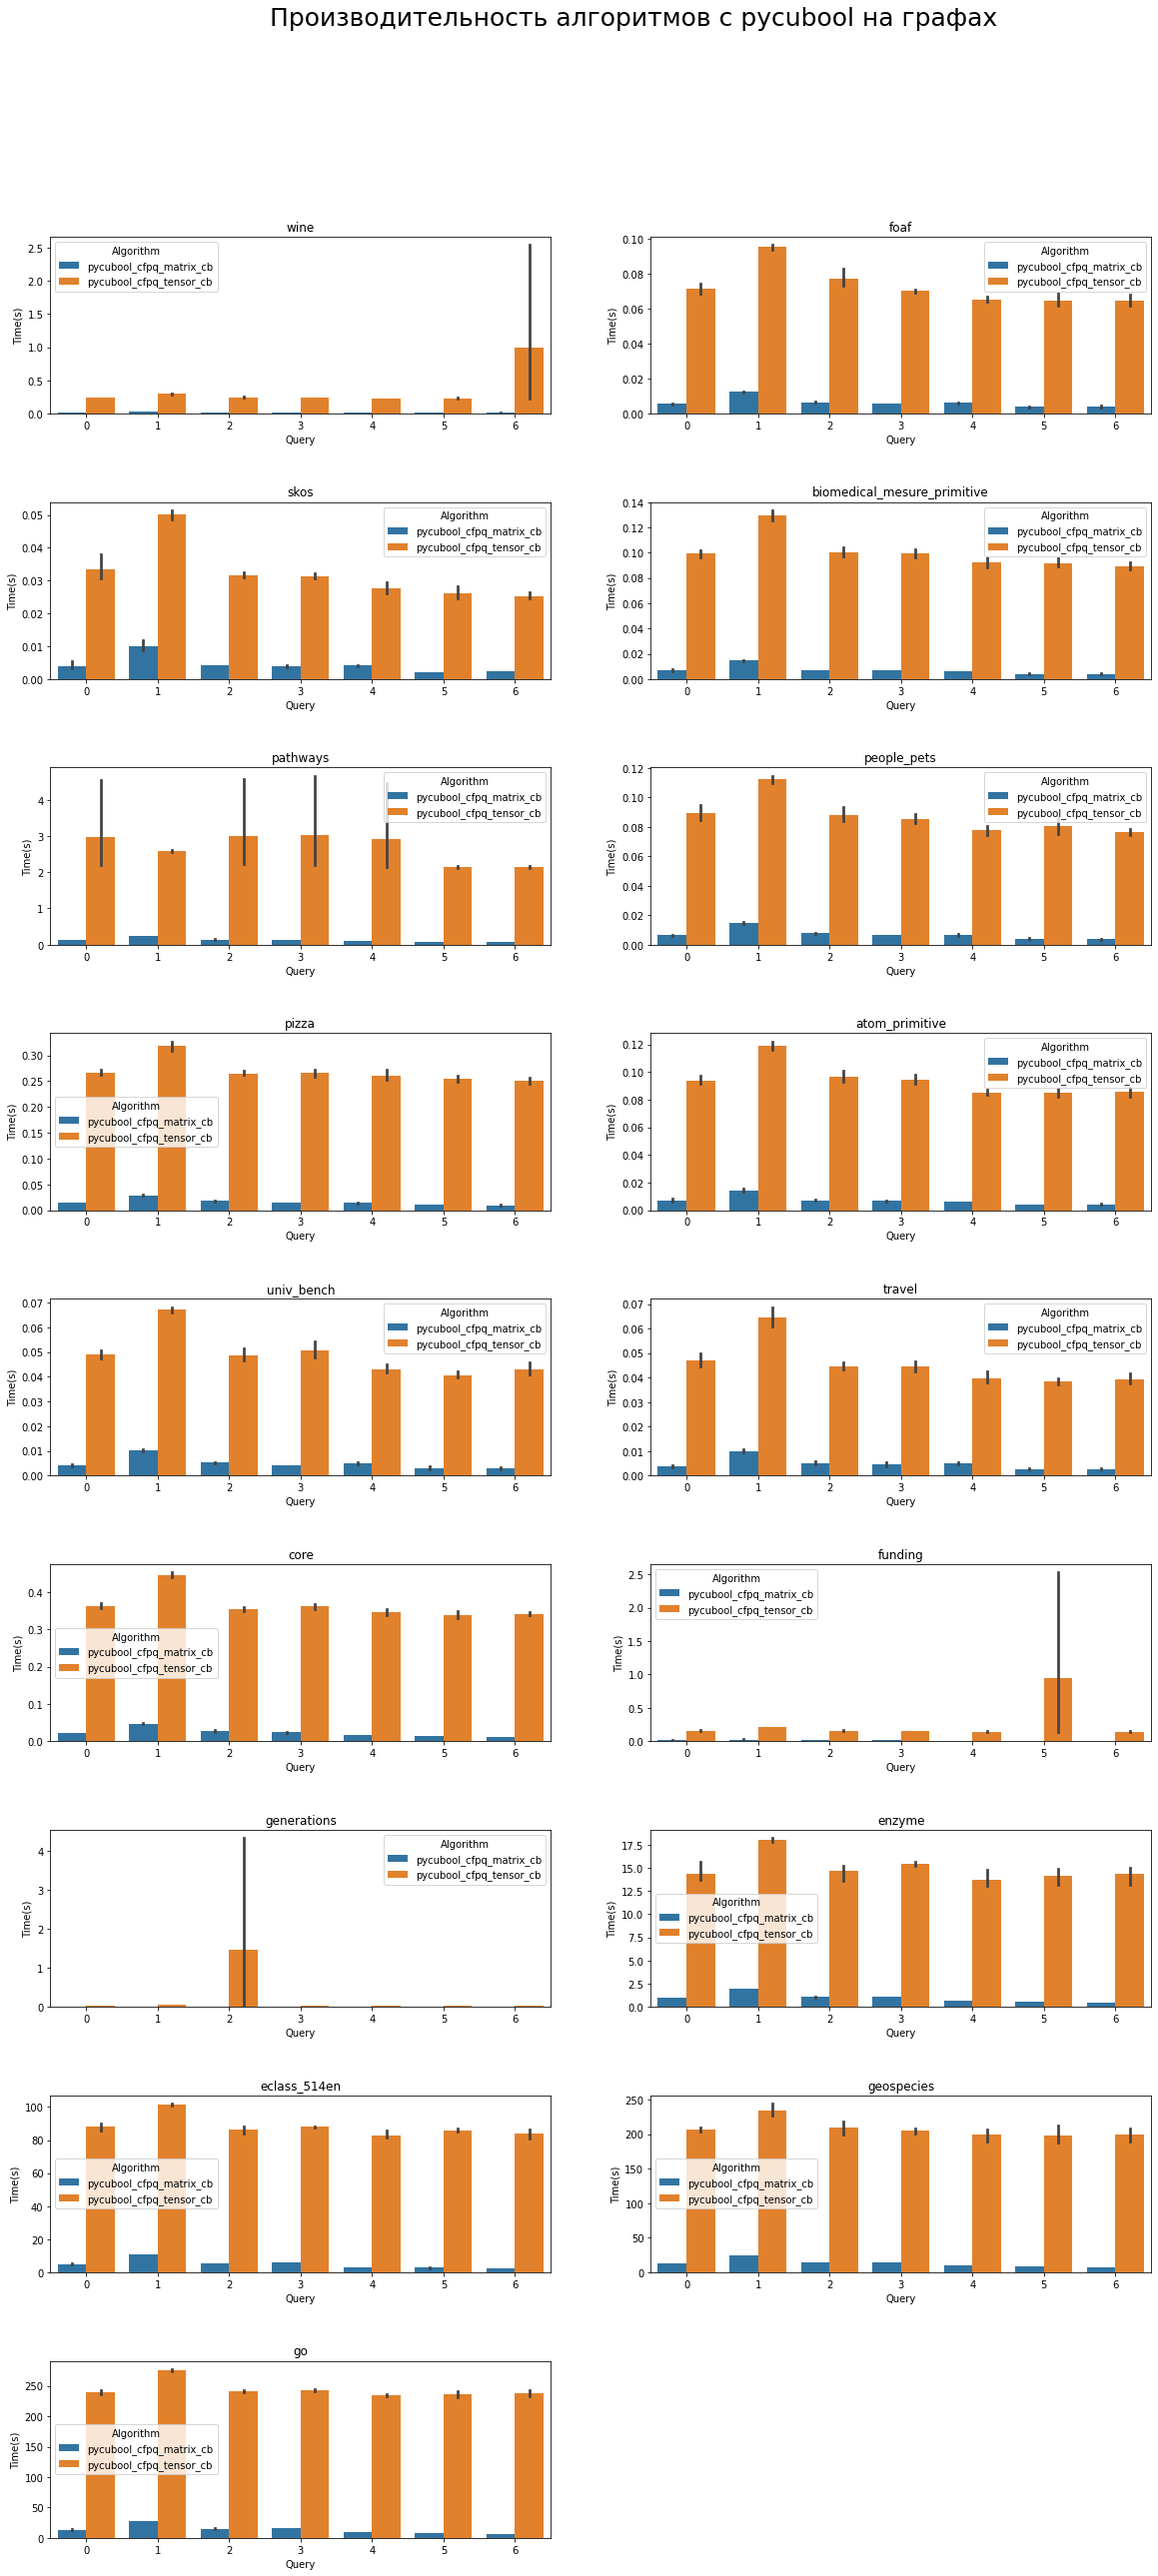

In [31]:
df_sm_pycubool = pd.merge(create_df(small_graph_names + large_graph_names, pycubool_algos), graph_info, right_index=True, left_on='Graph')

show_barplots(df_sm_pycubool, 'Производительность алгоритмов с pycubool на графах')

### Общий анализ производительности

In [32]:
all_algos = [
         ('scipy', 'cfpq_matrix', 'benchmark/scipy_cfpq_matrix'),
         ('scipy', 'cfpq_hellings', 'benchmark/scipy_cfpq_hellings'),
         ('scipy', 'cfpq_tensor', 'benchmark/scipy_cfpq_tensor'),
         ('pycubool', 'cfpq_matrix_cb', 'benchmark/pycubool_cfpq_matrix'),
         ('pycubool', 'cfpq_tensor_cb', 'benchmark/pycubool_cfpq_tensor'),
]

In [41]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 600)

df_sm = pd.merge(create_df(small_graph_names + large_graph_names, all_algos), graph_info, right_index=True, left_on='Graph')

#### Общие графики замеров

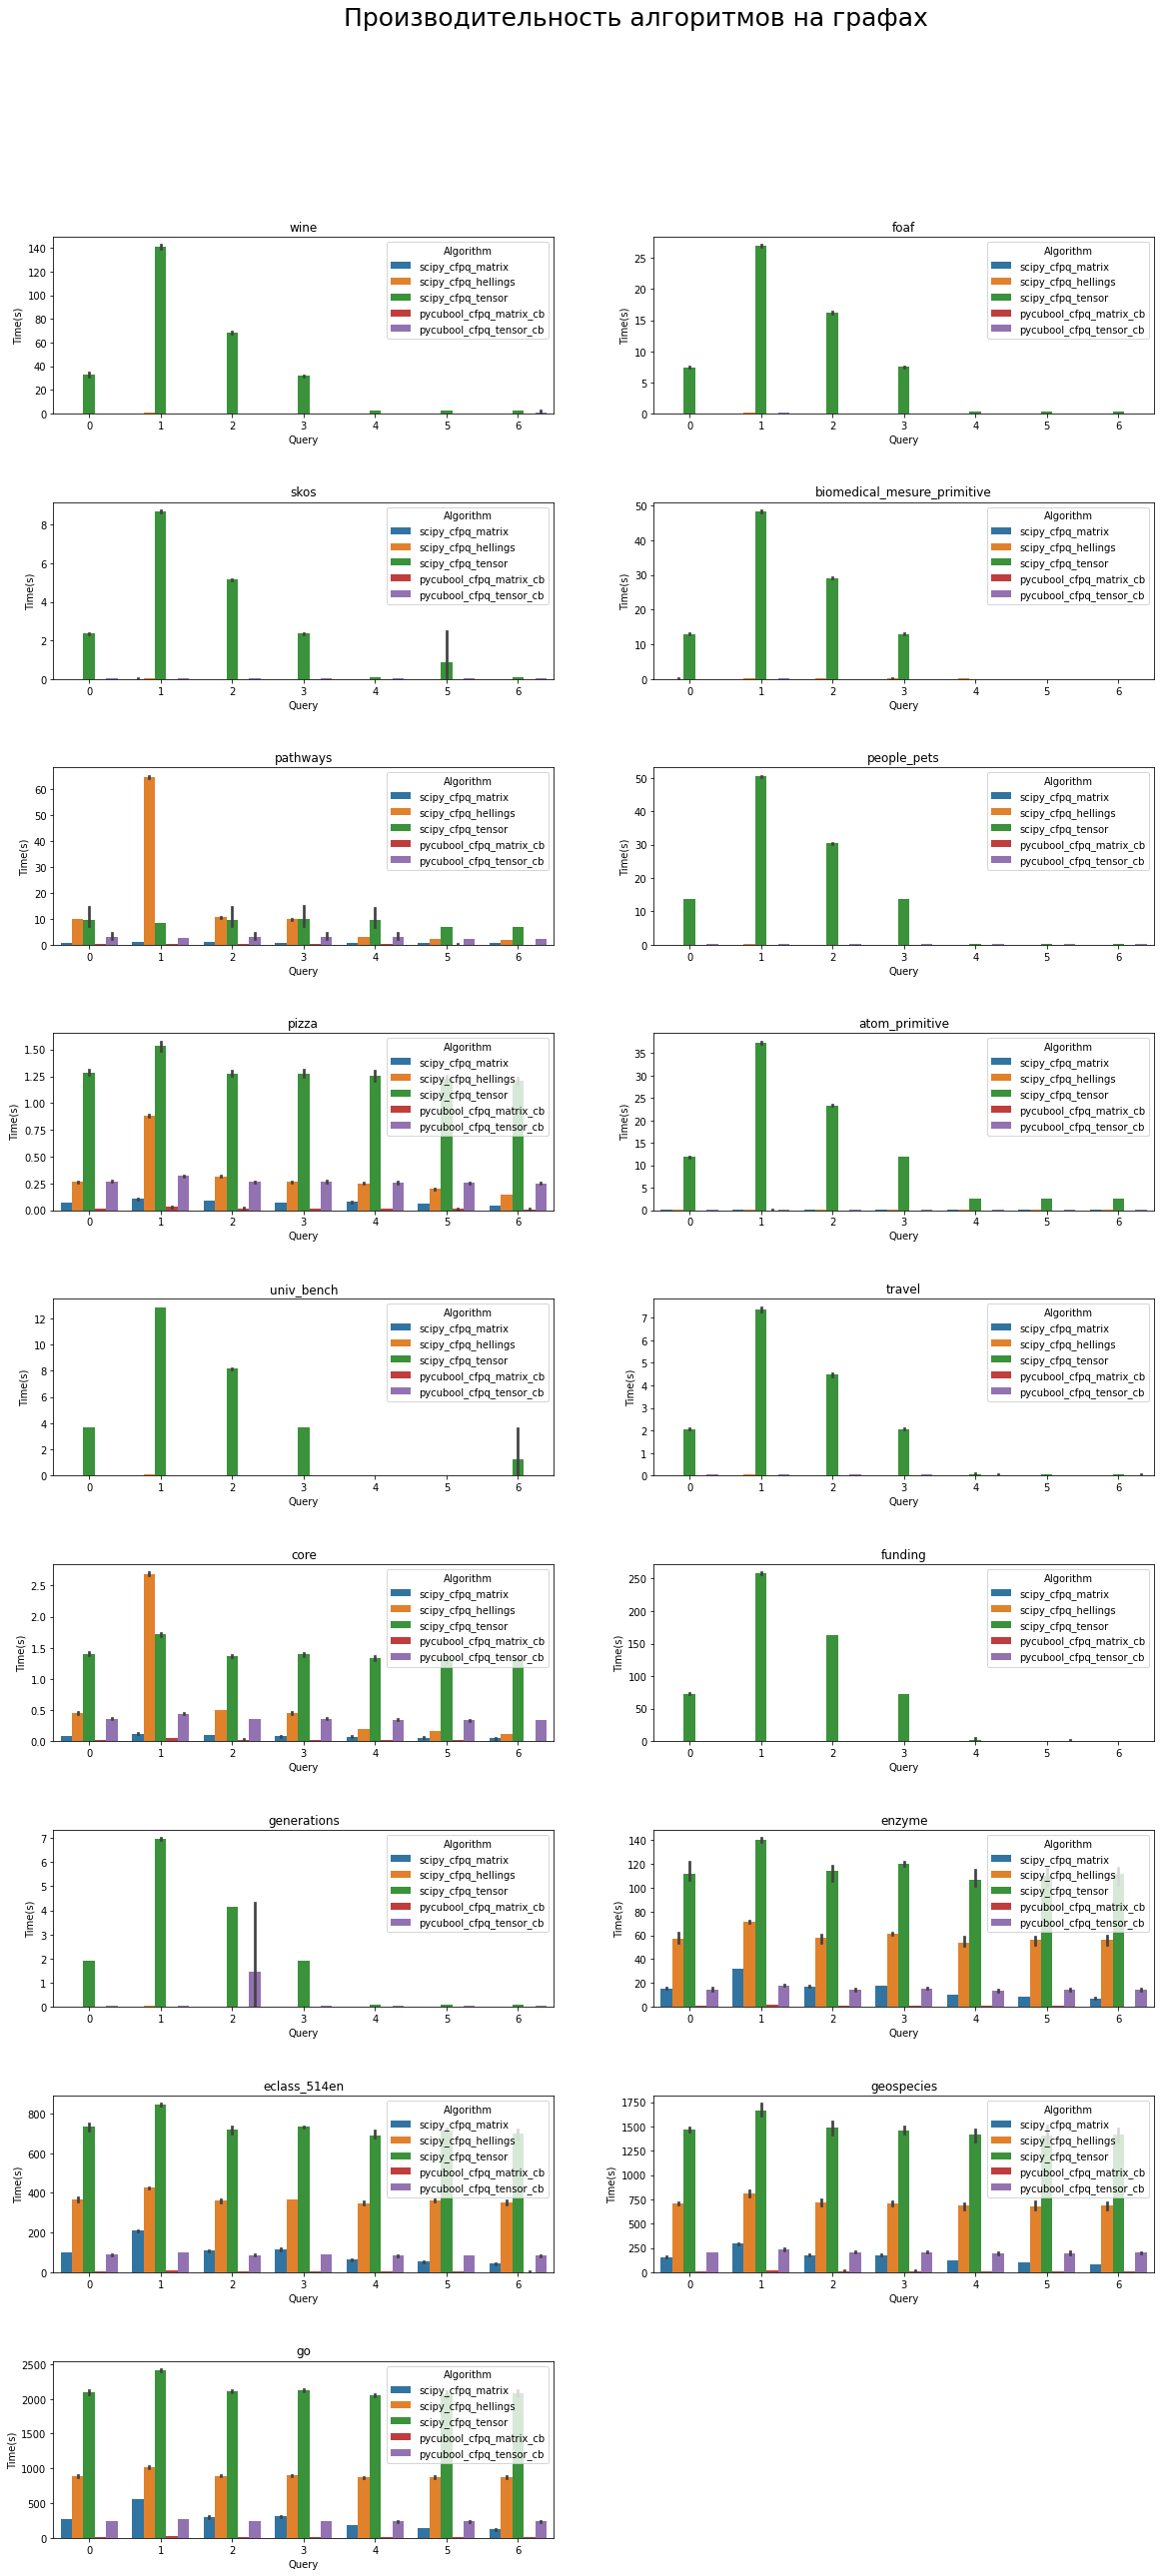

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

show_barplots(df_sm, 'Производительность алгоритмов на графах')

#### Общие таблицы замеров

In [42]:
df_sm.groupby(['Graph', 'Query', 'Algorithm'])['Time(s)'].describe()

count  ...         max
Graph                       Query Algorithm                       ...            
atom_primitive              0     pycubool_cfpq_matrix_cb   10.0  ...     0.01015
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.10588
                                  scipy_cfpq_hellings       10.0  ...     0.10741
                                  scipy_cfpq_matrix         10.0  ...     0.03650
                                  scipy_cfpq_tensor         10.0  ...    11.98869
                            1     pycubool_cfpq_matrix_cb   10.0  ...     0.01812
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.13256
                                  scipy_cfpq_hellings       10.0  ...     0.23753
                                  scipy_cfpq_matrix         10.0  ...     0.04941
                                  scipy_cfpq_tensor         10.0  ...    38.12785
                            2     pycubool_cfpq_matrix_cb   10.0  ...     0.01021
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.10933
                                  scipy_cfpq_hellings       10.0  ...     0.13463
                                  scipy_cfpq_matrix         10.0  ...     0.04292
                                  scipy_cfpq_tensor         10.0  ...    23.52282
                            3     pycubool_cfpq_matrix_cb   10.0  ...     0.00917
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.10554
                                  scipy_cfpq_hellings       10.0  ...     0.10681
                                  scipy_cfpq_matrix         10.0  ...     0.04377
                                  scipy_cfpq_tensor         10.0  ...    12.12400
                            4     pycubool_cfpq_matrix_cb   10.0  ...     0.00663
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.09063
                                  scipy_cfpq_hellings       10.0  ...     0.12430
                                  scipy_cfpq_matrix         10.0  ...     0.04734
                                  scipy_cfpq_tensor         10.0  ...     2.69517
                            5     pycubool_cfpq_matrix_cb   10.0  ...     0.00432
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.09324
                                  scipy_cfpq_hellings       10.0  ...     0.09024
                                  scipy_cfpq_matrix         10.0  ...     0.03512
                                  scipy_cfpq_tensor         10.0  ...     2.68136
                            6     pycubool_cfpq_matrix_cb   10.0  ...     0.00569
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.09875
                                  scipy_cfpq_hellings       10.0  ...     0.06390
                                  scipy_cfpq_matrix         10.0  ...     0.02842
                                  scipy_cfpq_tensor         10.0  ...     2.68803
biomedical_mesure_primitive 0     pycubool_cfpq_matrix_cb   10.0  ...     0.00997
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.10565
                                  scipy_cfpq_hellings       10.0  ...     0.12047
                                  scipy_cfpq_matrix         10.0  ...     0.03548
                                  scipy_cfpq_tensor         10.0  ...    13.21913
                            1     pycubool_cfpq_matrix_cb   10.0  ...     0.01537
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.14169
                                  scipy_cfpq_hellings       10.0  ...     0.28974
                                  scipy_cfpq_matrix         10.0  ...     0.05730
                                  scipy_cfpq_tensor         10.0  ...    48.90628
                            2     pycubool_cfpq_matrix_cb   10.0  ...     0.00763
                                  pycubool_cfpq_tensor_cb   10.0  ...     0.11443
                                  scipy_c

Исходя из полученных данных и построенных таблиц и графиков, видно, что алгоритм, реализованный с использованием библиотеки **pycubool** показал лучшие результаты, нежели алгоритм, реализованный с использованием библиотеки **scipy.sparse**. 

## Заключение

Как было уставновлено выше, алгоритм решения задачи $CFPQ$ показал лучшие результаты в случае применения библиотеки *pycubool* для реализации операций с  матрицами. Результат можно объяснить тем, что библиотека *pycubool* во внутренней реализации использует возможности *NVIDIA CUDA*. Таким образом,цель исследования успешно достигнута.
